In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score


In [10]:
df = pd.read_csv("../data/data_preparado.csv")
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.278149,-1.0,0.990129,1.297693,2.065835,0.510932,-1.465383,0.033695,1.153470,0.724450,0.374850,1.0
1,-1.485893,-1.0,-1.009969,0.510010,0.123035,-1.254185,1.441668,1.506599,1.313441,0.558651,0.374850,-1.0
2,1.454178,1.0,0.990129,-1.602413,-1.551792,-0.548138,-1.296097,-1.144628,-0.971851,-1.497251,-1.356780,1.0
3,-1.485893,1.0,-1.009969,0.044561,0.056042,1.570002,-0.764889,1.025967,0.193648,0.326533,0.158396,1.0
4,0.278149,1.0,-1.009969,0.689029,0.725973,0.157909,1.015534,-0.912064,0.605000,1.033940,1.055133,-1.0


In [11]:
def model_sep(data_norm):
    X = data_norm.drop(columns = ["loan_status"])
    y = data_norm["loan_status"]
        
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)
    return X_train, X_test, y_train, y_test

def create_model(X_train, X_test, y_train, y_test):
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_proba = lr.predict_proba(X_test)[:, 1]
    return y_pred
    
def model_data(data_norm):
    X_train, X_test, y_train, y_test = model_sep(data_norm)
    y_pred = create_model(X_train, X_test, y_train, y_test)
    return X_test,y_test, y_pred

X_test,y_test, y_pred = model_data(df)

def Evaluation(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    return accuracy, conf_matrix, class_report

In [12]:
X_test.assign(Real = y_test).assign(Predict = y_pred)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Real,Predict
1429,0.278149,1.0,-1.009969,-1.495002,-1.473633,0.157909,-0.105257,-0.788030,-1.040410,-1.342506,-1.418624,1.0,1.0
346,0.278149,1.0,-1.009969,-0.420889,-0.513399,1.570002,1.494205,-0.912064,0.307912,-0.458247,-0.336355,-1.0,-1.0
1391,1.454178,1.0,0.990129,-0.170262,-0.256592,0.510932,1.190657,0.870925,0.833529,-0.336661,-0.460043,-1.0,-1.0
393,-1.485893,-1.0,-1.009969,1.584123,1.485228,1.216979,0.069867,-0.198869,1.222029,1.663975,2.817685,-1.0,-1.0
194,-0.897879,-1.0,0.990129,-0.170262,-0.178434,1.570002,1.587604,-0.291894,0.627853,-0.358768,-0.769263,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,-1.485893,-1.0,0.990129,0.295187,0.011380,0.863955,-0.969200,1.196514,-0.400528,-0.325608,0.467616,1.0,1.0
361,-0.309865,1.0,-1.009969,-0.206066,-0.066779,1.216979,-0.391292,0.064704,-1.086116,-0.181916,-0.058058,1.0,1.0
135,0.278149,1.0,-1.009969,-1.351787,-1.317316,-0.548138,1.342431,-0.943073,-0.948998,-1.165654,-1.047561,-1.0,-1.0
3053,0.866163,1.0,0.990129,1.476712,1.451732,0.157909,1.138120,2.436855,1.084911,0.790769,2.446621,-1.0,-1.0


In [13]:
accuracy, conf_matrix, class_report = Evaluation(y_test, y_pred)

In [14]:
# Acuracia
print(f'A Acuracia do modelo foi de: {(accuracy*100):.2f}%')
print(" ")
# Acuracia Balanceada
accuracy_balan = balanced_accuracy_score(y_test, y_pred)
print(f'A Acuracia balanceada do modelo foi de: {(accuracy_balan*100):.1f}%')
print(" ")
# Precisão
precision = precision_score(y_test, y_pred)
print(f"A Precisão do modelo foi de: {(precision*100):.2f}%")
print(" ")
# Recall
recall = recall_score(y_test, y_pred)
print(f"O Recall do modelo foi de: {(recall*100):.2f}%")
print(" ")
# F1
f1 = f1_score(y_test, y_pred)
print(f"F1 do modelo foi de: {(f1*100):.2f}%")
print(" ")

A Acuracia do modelo foi de: 92.72%
 
A Acuracia balanceada do modelo foi de: 92.7%
 
A Precisão do modelo foi de: 91.49%
 
O Recall do modelo foi de: 94.06%
 
F1 do modelo foi de: 92.76%
 


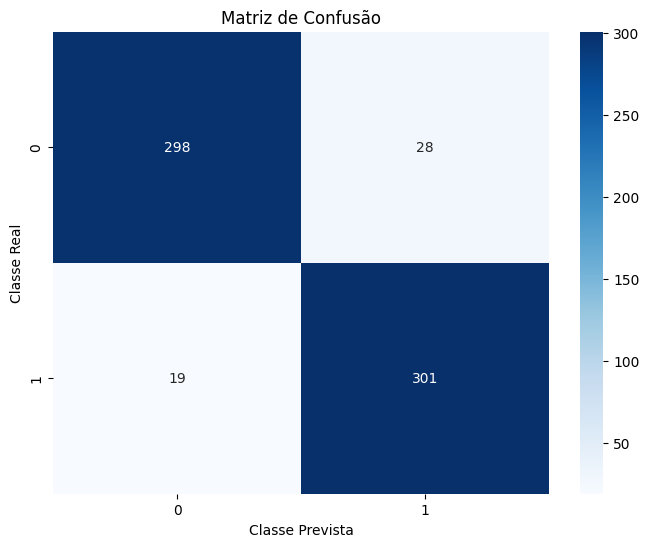

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


Matriz de Confusão

---




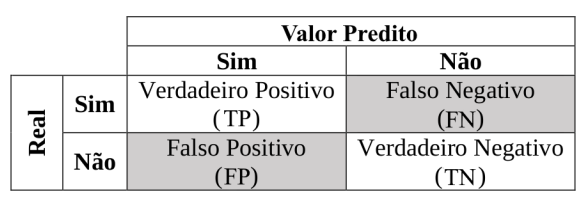


---



<br><br>

- Verdadeiro Positivo (TP): São os casos em que o modelo previu corretamente que a classe é positiva.
- Falso Positivo (FP): São os casos em que o modelo previu incorretamente que a classe é positiva (quando, na verdade, é negativa).
- Verdadeiro Negativo (TN): São os casos em que o modelo previu corretamente que a classe é negativa.
- Falso Negativo (FN): São os casos em que o modelo previu incorretamente que a classe é negativa (quando, na verdade, é positiva).

In [16]:
print(class_report)

              precision    recall  f1-score   support

        -1.0       0.94      0.91      0.93       326
         1.0       0.91      0.94      0.93       320

    accuracy                           0.93       646
   macro avg       0.93      0.93      0.93       646
weighted avg       0.93      0.93      0.93       646

